# Problem #2

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn

Question 1)

In [2]:
def Monte_Carlo_Simulation(N,taumax,w):
    Nref=0
    Nabs=0
    Ntra=0
    Ntot=N
    for photon_count in range(1,N+1):
        s=-np.log(1.-(np.random.random()))
        if 0 < s and s < taumax:
            pos = s
            while 0 < pos and pos < taumax:
                if np.random.random() <= w:
                    u=2*(np.random.random())-1
                    theta = np.rad2deg(np.arccos(u))
                    s_new=-np.log(1.-(np.random.random()))
                    pos+= s_new * np.cos(np.deg2rad(theta))
                else:
                    Nabs+=1
                    break
            else:
                if pos<0:
                    Nref+=1
                elif pos > taumax :
                    Ntra+=1
        elif s < 0:
            Nref+=1
        elif s>taumax:
            Ntra+=1
    return Nref/Ntot,Nabs/Ntot,Ntra/Ntot

In [3]:
taumax = np.arange(0.1, 50.0)
Result1 = [Monte_Carlo_Simulation(10000,i,0.2) for i in taumax] 
Result2 = [Monte_Carlo_Simulation(10000,i,0.4) for i in taumax] 
Result3 = [Monte_Carlo_Simulation(10000,i,0.6) for i in taumax] 
Result4 = [Monte_Carlo_Simulation(10000,i,0.8) for i in taumax] 
Result5 = [Monte_Carlo_Simulation(10000,i,1.0) for i in taumax] 

In [4]:
R2 = np.array([Result1, Result2, Result3, Result4, Result5])
R2.shape

(5, 50, 3)

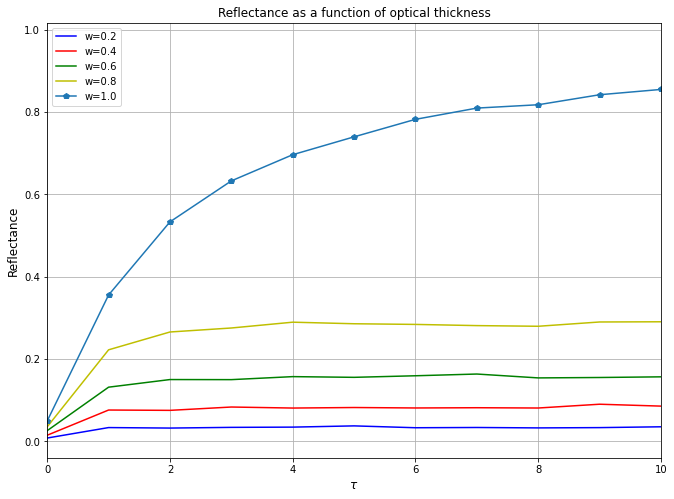

In [5]:
fig,ax = plt.subplots(figsize=(11,8))
ax.plot(R2[0,:,0],'b-', label='w=0.2')
ax.plot(R2[1,:,0],'r-', label='w=0.4')
ax.plot(R2[2,:,0],'g-', label='w=0.6')
ax.plot(R2[3,:,0],'y-', label='w=0.8')
ax.plot(R2[4,:,0],'p-', label='w=1.0')
ax.set_ylabel('Reflectance',fontsize='large')
ax.set_xlabel(r'$\tau$',fontsize='large')
ax.grid(True)
ax.set_title('Reflectance as a function of optical thickness',fontsize='large')
ax.set_xlim(0.0,10)
ax.legend()
plt.show()

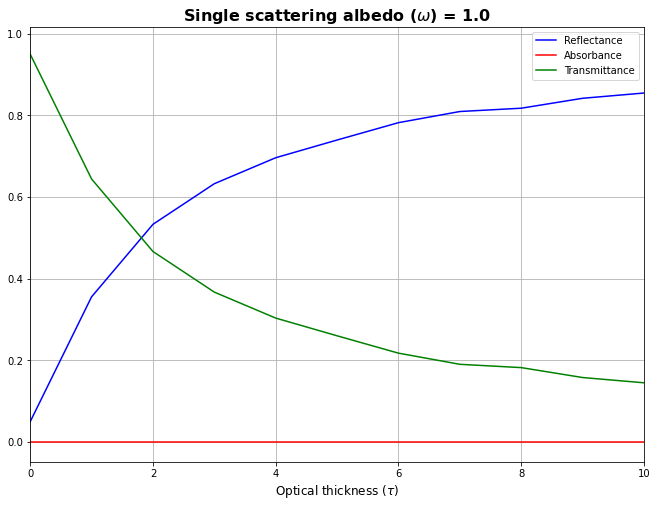

In [6]:
fig,ax = plt.subplots(figsize=(11,8))
ax.plot(R2[4,:,0],'b-', label='Reflectance')
ax.plot(R2[4,:,1],'r-', label='Absorbance')
ax.plot(R2[4,:,2],'g-', label='Transmittance')
#ax.set_ylabel('R, A, T',fontsize='large')
ax.set_xlabel(r'Optical thickness ($\tau$)',fontsize='large')
ax.grid(True)
ax.set_title("Single scattering albedo ($\omega$) = 1.0",fontsize= 16, weight='semibold')
ax.set_xlim(0.0,10)
ax.legend()
plt.show()

# The dependence of cloud reflectance (R) on optical thickness varies with the single scattering albedo (w). For w = 1, the reflectance continues to increase as optical thickness increases. For w < 1, absorption dominates causing the reflection to increase to a point before levelling off.

Question 2)

In [7]:
def Photon_depth_tracker(N, taumax, w):
    Nref = 0
    Nabs = 0
    Ntra = 0
    Ntot = N
    z1 = {}
    z2 = {}
    for photon_count in range(1, N+1):
        s=-1.0*np.log(1.-np.random.random())
        if 0 < s and s < taumax:
            pos = s
            depth = [s]
            while 0 < pos and pos < taumax:
                if np.random.random() <= w:
                    u = 2*(np.random.random())-1
                    theta = np.rad2deg(np.arccos(u))
                    s_new=-1.0*np.log(1.-np.random.random())
                    pos+= s_new * np.cos(np.deg2rad(theta))
                    depth.append(pos)
                else:
                    Nabs+=1
                    break
            else:
                if pos < 0:
                    Nref==1
                    z1.update({photon_count:max(depth)})
                elif pos > taumax:
                    Ntra+=1
        elif s < 0:
            Nref+=1
            z2.update({photon_count:L})
        elif s > taumax:
            Ntra+=1
    return {**z1, **z2}

In [8]:
depth1 = Photon_depth_tracker(10000, 10, 1);
depth2 = Photon_depth_tracker(10000, 10, 0.96);
depth3 = Photon_depth_tracker(10000, 10, 0.88);

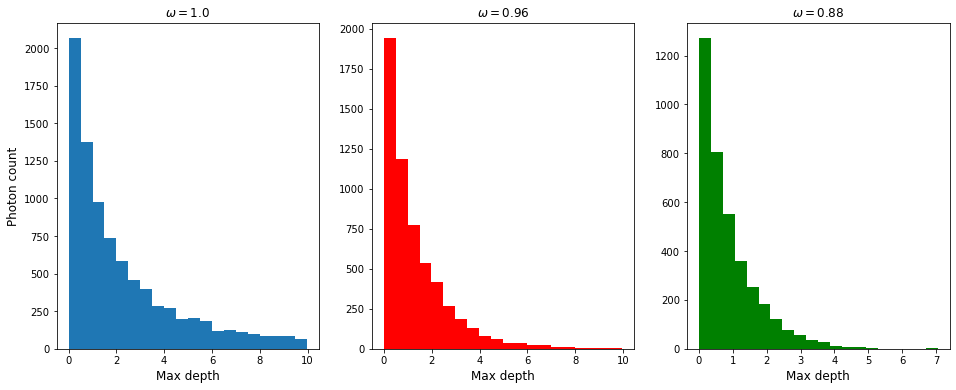

In [9]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(16,6))
ax1.hist(list(depth1.values()),bins=20)
ax1.set_title(r'$\omega=1.0$')
ax1.set_ylabel('Photon count',fontsize='large')
ax1.set_xlabel(r'Max depth' ,fontsize='large')
ax2.hist(list(depth2.values()),bins=20, color='r')
ax2.set_title(r'$\omega=0.96$')
ax2.set_xlabel(r'Max depth' ,fontsize='large')
ax3.hist(list(depth3.values()),bins=20, color='g')
ax3.set_title(r'$\omega=0.88$')
ax3.set_xlabel(r'Max depth',fontsize='large')
plt.show()

# The higher the single scattering albedo (w), the further the depth the photons can reach. From the plot, only for w = 1 were the photons able to reach the maximum depth. As w decreases, the depth the photon can reach decreases. 